In [1]:
import numpy as np
import pandas as pd

In [2]:
X_train = pd.read_csv("X_train.csv").set_index('enrollee_id')
Y_train = pd.read_csv("Y_train.csv").set_index('enrollee_id').values.flatten()
X_test = pd.read_csv("X_test.csv").set_index('enrollee_id')
Y_test = pd.read_csv("Y_test.csv").set_index('enrollee_id').values.flatten()

In [7]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from matplotlib import pyplot

In [4]:
def training(X_train, X_test, y_train, y_test, model): 
    # training process
    model.fit(X_train, y_train)
    
    # testing
    y_pred = model.predict_proba(X_test)[:,1]
    y_pred_train = model.predict_proba(X_train)[:,1]
    #print(y_test.to_numpy())
    #print(y_pred)
    
    test_score = metrics.roc_auc_score(y_test, y_pred)
    train_score = metrics.roc_auc_score(y_train, y_pred_train)
    return {'test_score':test_score, 'train_score':train_score}

In [5]:
selected_col = ['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'company_size',
       'last_new_job', 'training_hours', 'company_type_Pvt Ltd']

X_train = X_train[selected_col] 
X_test = X_test[selected_col]

# Tunning Model

In [15]:
param = []
for boosting_type in ('gbdt','dart','goss'):
    for max_depth in range (5,15):
        for n_estimators in range(20,100,20):
            model = LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth, boosting_type=boosting_type)
            result = training(X_train, X_test, Y_train, Y_test, model)
            print(n_estimators, max_depth, boosting_type)
            print(result['test_score'])
            print(result['train_score'])
            print()
            param.append((result['test_score'],result['train_score'],n_estimators, max_depth, boosting_type))

20 5 gbdt
0.7906012966196296
0.8238782515735417

40 5 gbdt
0.7959430546412113
0.8379788422380288

60 5 gbdt
0.7971366316512579
0.8482065345378487

80 5 gbdt
0.798574219309042
0.8561554580629173

20 6 gbdt
0.7905199001059049
0.8281014591389045

40 6 gbdt
0.7961906431576837
0.8467238825416333

60 6 gbdt
0.7985892463577297
0.8588748260361311

80 6 gbdt
0.7974620388127199
0.8689656384708994

20 7 gbdt
0.792510089589833
0.8285464786067074

40 7 gbdt
0.7941222772418925
0.8480873014845046

60 7 gbdt
0.7977482683115322
0.8622257100089039

80 7 gbdt
0.7979908478117754
0.8724090168651664

20 8 gbdt
0.7934943612788734
0.8290782130223967

40 8 gbdt
0.7941106491685034
0.8519829065557574

60 8 gbdt
0.7957659501388213
0.8655995633916079

80 8 gbdt
0.7955398288347596
0.8764640029141338

20 9 gbdt
0.7923784240203795
0.8286610058435961

40 9 gbdt
0.7958258794401352
0.8520464122341359

60 9 gbdt
0.796211931476658
0.8672929263149324

80 9 gbdt
0.795726414689298
0.8793246595998554

20 10 gbdt
0.79162760826

In [16]:
param.sort()
param[::-1]

[(0.800194099378882, 0.8280361602246438, 20, 13, 'goss'),
 (0.7988466740132238, 0.829515157217787, 40, 5, 'goss'),
 (0.7985892463577297, 0.8588748260361311, 60, 6, 'gbdt'),
 (0.798574219309042, 0.8561554580629173, 80, 5, 'gbdt'),
 (0.7982053410424478, 0.8379592765497081, 40, 6, 'goss'),
 (0.7979908478117754, 0.8724090168651664, 80, 7, 'gbdt'),
 (0.7977482683115322, 0.8622257100089039, 60, 7, 'gbdt'),
 (0.7977441537624869, 0.8699510501429186, 60, 10, 'gbdt'),
 (0.7976234006926753, 0.882254087452756, 80, 10, 'gbdt'),
 (0.7974620388127199, 0.8689656384708994, 80, 6, 'gbdt'),
 (0.7974539886080659, 0.8413367506698308, 40, 12, 'goss'),
 (0.7974183888141512, 0.8279018731273964, 20, 11, 'goss'),
 (0.7972722328763203, 0.8490051412872277, 60, 8, 'dart'),
 (0.7971607822652202, 0.8807872776104815, 80, 14, 'gbdt'),
 (0.7971366316512579, 0.8482065345378487, 60, 5, 'gbdt'),
 (0.7970940550133097, 0.8620033030719638, 80, 14, 'goss'),
 (0.7969518347310874, 0.8516611863322165, 80, 8, 'dart'),
 (0.7968409

# Importance feature

test_score:  0.800194099378882
train_score:  0.8280361602246438
city_development_index
Feature: 0, Score: 163.00000
gender
Feature: 1, Score: 12.00000
relevent_experience
Feature: 2, Score: 31.00000
enrolled_university
Feature: 3, Score: 28.00000
education_level
Feature: 4, Score: 43.00000
experience
Feature: 5, Score: 79.00000
company_size
Feature: 6, Score: 64.00000
last_new_job
Feature: 7, Score: 43.00000
training_hours
Feature: 8, Score: 122.00000
company_type_Pvt Ltd
Feature: 9, Score: 15.00000


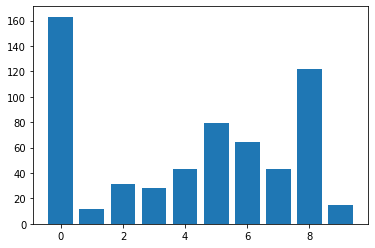

In [17]:
model = LGBMClassifier(n_estimators=20, max_depth=13, boosting_type='goss')
result = training(X_train, X_test, Y_train, Y_test, model)
print('test_score: ',result['test_score'])     
print('train_score: ',result['train_score'])
importance = model.feature_importances_

for i,v in enumerate(importance):
    print(X_train.columns[i])
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Scoring Model

In [18]:
test_df = pd.read_csv('test_processed.csv').set_index('enrollee_id')[selected_col] 
predict = model.predict_proba(test_df)[:,1]
target_values = np.load("jobchange_test_target_values.npy")
score = metrics.roc_auc_score(target_values,predict)
print("AUC Score: ",score)

AUC Score:  0.7981645068684267


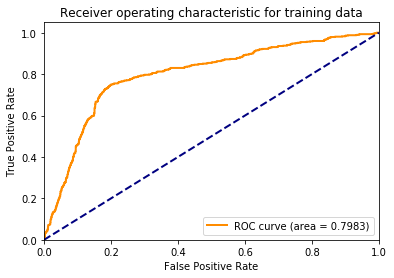

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(target_values, predict)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for training data')
plt.legend(loc="lower right")
plt.show()